In [17]:
import time
import config
import tmdbsimple as tmdb          # tmdbsimple 2.2.0
tmdb.API_KEY = config.tmdb_api_key # get TMDB API key from config.py file

import pprint as pp
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
print("Enter actor's full name...")
actor = input("... MUST be a string: ")
search = tmdb.Search()
actor_response = search.person(query=actor) 
actor_id = search.results[0]['id']
actor_id

Enter actor's full name...
... MUST be a string: Dustin Hoffman


4483

In [14]:
actor_movie_credits = actor + " Movies"
actor_movie_credits

'Dustin Hoffman Movies'

In [52]:
#Now get actor's credits
search_actor_id = tmdb.People(actor_id)
response_actor_id = search_actor_id.movie_credits()
response_actor_id
#actor_movie_credits = actor + " Credits")

{'cast': [{'character': 'Raymond Babbitt',
   'credit_id': '52fe423cc3a36847f800e8b7',
   'poster_path': '/vllKYkA7eYi2UMM9yWQ1JegefBh.jpg',
   'id': 380,
   'video': False,
   'vote_count': 3318,
   'adult': False,
   'backdrop_path': '/eZ4Aj1O6E95Mk5O9oKKdvfnSWzf.jpg',
   'genre_ids': [18],
   'original_language': 'en',
   'original_title': 'Rain Man',
   'popularity': 12.331,
   'title': 'Rain Man',
   'vote_average': 7.7,
   'overview': "Selfish yuppie Charlie Babbitt's father left a fortune to his savant brother Raymond and a pittance to Charlie; they travel cross-country.",
   'release_date': '1988-12-11'},
  {'character': 'Stanley Motss',
   'credit_id': '52fe4258c3a36847f8016f15',
   'poster_path': '/cGatilylRyJiCoOu5T5sAB17HKR.jpg',
   'id': 586,
   'video': False,
   'vote_count': 459,
   'adult': False,
   'backdrop_path': '/bWoNwo04ZfZoEvEF8gliyB1EAyS.jpg',
   'genre_ids': [35, 18],
   'original_language': 'en',
   'original_title': 'Wag the Dog',
   'popularity': 11.072,
 

In [53]:
num_of_credits = len(response_actor_id['cast'][:])
num_of_credits   #how many movies

108

In [55]:
#Put all records in actor's first part of Data Frame (ie. hoffman_df)
labels = ['title','popularity','vote_average','vote_count']
idx = [film['id'] for film in response_actor_id['cast'][:]]
records = []
for film in (response_actor_id['cast'][:]):
    record = [film['title'], film['popularity'], film['vote_average'], film['vote_count']]
    records.append(record)

actor_df = pd.DataFrame.from_records(records, columns=labels, index=idx)
actor_df

,title,popularity,vote_average,vote_count
380,Rain Man,12.331,7.7,3318
586,Wag the Dog,11.072,6.9,459
693,Meet the Fockers,12.842,6.2,2796
819,Sleepers,12.434,7.5,1485
866,Finding Neverland,9.334,7.3,2353
879,Hook,12.376,6.9,3087
891,All the President's Men,18.213,7.7,809
994,Straw Dogs,10.811,7.2,407
1262,Stranger Than Fiction,8.176,7.2,1243
1427,Perfume: The Story of a Murderer,10.036,7.2,2356


In [56]:
#Now get 2nd part of actor's df from the tmdb.Movies for merging
labels = ['revenue','budget','profit','genres']
film_indices = [film[0] for film in actor_df.iterrows()]
#print(film_indices)
records = []
request_rate_limit = 40     #TMDB has rate limit of 40 requests per 10 seconds

for film_idx in film_indices:
    request_rate_limit -= 1
    if request_rate_limit == 0:            
        print("Hold yer horses, cowboy!")
        print("...wait per request limit...")
        time.sleep(10)
        request_rate_limit = 39
    movie = tmdb.Movies(film_idx)  #Each movie has unique identifier stored as index of df
    response = movie.info()
        
    profit = response['revenue'] - response['budget']
    record = [response['revenue'], response['budget'], profit, response['genres']]    
    records.append(record)

actor_movies_df = pd.DataFrame.from_records(records, columns=labels, index=film_indices)
actor_movies_df    

Hold yer horses, cowboy!
...wait per request limit...
Hold yer horses, cowboy!
...wait per request limit...


,revenue,budget,profit,genres
380,412800000,25000000,387800000,"[{'id': 18, 'name': 'Drama'}]"
586,64256513,15000000,49256513,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
693,516642939,80000000,436642939,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
819,165615285,44000000,121615285,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
866,116766556,25000000,91766556,"[{'id': 18, 'name': 'Drama'}]"
879,300854823,70000000,230854823,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
891,70600000,8500000,62100000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."
994,3251794,2200000,1051794,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
1262,53653224,30000000,23653224,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
1427,132180323,50000000,82180323,"[{'id': 80, 'name': 'Crime'}, {'id': 14, 'name..."


In [57]:
print(actor_df.shape)
actor_df.head(5)

(108, 4)


,title,popularity,vote_average,vote_count
380,Rain Man,12.331,7.7,3318
586,Wag the Dog,11.072,6.9,459
693,Meet the Fockers,12.842,6.2,2796
819,Sleepers,12.434,7.5,1485
866,Finding Neverland,9.334,7.3,2353


In [58]:
print(actor_movies_df.shape)
actor_movies_df.head(5)

(108, 4)


,revenue,budget,profit,genres
380,412800000,25000000,387800000,"[{'id': 18, 'name': 'Drama'}]"
586,64256513,15000000,49256513,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
693,516642939,80000000,436642939,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
819,165615285,44000000,121615285,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
866,116766556,25000000,91766556,"[{'id': 18, 'name': 'Drama'}]"


In [59]:
# This builds the full df, still need to build final
actor_full_df = pd.merge(actor_df, actor_movies_df, left_index=True, right_index=True)
print(actor_full_df.shape)
actor_full_df

(108, 8)


,title,popularity,vote_average,vote_count,revenue,budget,profit,genres
380,Rain Man,12.331,7.7,3318,412800000,25000000,387800000,"[{'id': 18, 'name': 'Drama'}]"
586,Wag the Dog,11.072,6.9,459,64256513,15000000,49256513,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
693,Meet the Fockers,12.842,6.2,2796,516642939,80000000,436642939,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
819,Sleepers,12.434,7.5,1485,165615285,44000000,121615285,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
866,Finding Neverland,9.334,7.3,2353,116766556,25000000,91766556,"[{'id': 18, 'name': 'Drama'}]"
879,Hook,12.376,6.9,3087,300854823,70000000,230854823,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
891,All the President's Men,18.213,7.7,809,70600000,8500000,62100000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."
994,Straw Dogs,10.811,7.2,407,3251794,2200000,1051794,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
1262,Stranger Than Fiction,8.176,7.2,1243,53653224,30000000,23653224,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
1427,Perfume: The Story of a Murderer,10.036,7.2,2356,132180323,50000000,82180323,"[{'id': 80, 'name': 'Crime'}, {'id': 14, 'name..."


In [ ]:
#Save to PostgrSQL 

In [61]:
#Create new column containing a list of genres for each movie
def to_list(cell):
    #input is a single cell containing a list of dicts
    #rreturns a list of genres as unique strings
    l = []
    for d in cell:     #cell is list of dicts
        l.append(d['name'])
    return(l)

actor_full_df['genre_names'] = actor_full_df['genres'].map(to_list)
#Drop duplicate info
actor_full_df.drop(['genres'], axis=1, inplace=True)
actor_full_df

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
380,Rain Man,12.331,7.7,3318,412800000,25000000,387800000,[Drama]
586,Wag the Dog,11.072,6.9,459,64256513,15000000,49256513,"[Comedy, Drama]"
693,Meet the Fockers,12.842,6.2,2796,516642939,80000000,436642939,"[Comedy, Romance]"
819,Sleepers,12.434,7.5,1485,165615285,44000000,121615285,"[Crime, Drama, Thriller]"
866,Finding Neverland,9.334,7.3,2353,116766556,25000000,91766556,[Drama]
879,Hook,12.376,6.9,3087,300854823,70000000,230854823,"[Adventure, Fantasy, Comedy, Family]"
891,All the President's Men,18.213,7.7,809,70600000,8500000,62100000,"[Drama, History, Mystery, Thriller]"
994,Straw Dogs,10.811,7.2,407,3251794,2200000,1051794,"[Crime, Drama, Thriller]"
1262,Stranger Than Fiction,8.176,7.2,1243,53653224,30000000,23653224,"[Comedy, Drama, Fantasy, Romance]"
1427,Perfume: The Story of a Murderer,10.036,7.2,2356,132180323,50000000,82180323,"[Crime, Fantasy, Drama]"


In [217]:
print(actor_full_df.shape)
actor_full_df.describe()

(108, 8)


,popularity,vote_average,vote_count,revenue,budget,profit
count,108.00,108.00,108.00,108.00,108.00,108.00
mean,6.03,5.61,531.20,"54,488,792.89","18,096,666.67","36,392,126.22"
std,5.42,2.73,"1,034.58","126,834,970.42","34,069,419.57","101,493,169.02"
min,0.60,0.00,0.00,0.00,0.00,"-48,000,000.00"
25%,0.79,5.57,1.00,0.00,0.00,0.00
50%,5.11,6.45,63.50,0.00,0.00,0.00
75%,9.56,7.20,515.75,"47,792,701.25","21,250,000.00","19,238,706.50"
max,27.96,10.00,"6,405.00","665,692,281.00","150,000,000.00","515,692,281.00"


Delete rows with non-movies (eg. Documentary(99), TV Movie(10770) ). Deciding what constitutes a genre.
1. Eliminate rows containing Documentery or TV Movie as a genre.
2. Eliminate rows where revenue or budget are zero.

In [62]:
actor_full_df.head(3)

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
380,Rain Man,12.331,7.7,3318,412800000,25000000,387800000,[Drama]
586,Wag the Dog,11.072,6.9,459,64256513,15000000,49256513,"[Comedy, Drama]"
693,Meet the Fockers,12.842,6.2,2796,516642939,80000000,436642939,"[Comedy, Romance]"


In [65]:
# If Genres is in Documentary(99), TV Movie(10770), delete the row.
# If revenue, budget or profit is zero or NaN, eliminate the row.
# If vote_count	< 20, eliminate the row.
#hoffman_full_df.isnull().sum()


In [70]:
#Function removes Documentary(99) and TV Movie(10770) genres on each cell
def exclude_genres(cell):
    '''looks for excluded values in a cell
       returns boolean mask'''
    excluded_genre = ['TV Movie','Documentary']
#    print(cell)
    if len(cell) == 0:
        return False
    else:
        for g in excluded_genre:
            if g in cell:
                return False
    return True

#  .map to genres column
actor_full_df = actor_full_df[actor_full_df.genre_names.map(exclude_genres)]            
actor_full_df

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
380,Rain Man,12.33,7.70,3318,412800000,25000000,387800000,[Drama]
586,Wag the Dog,11.07,6.90,459,64256513,15000000,49256513,"[Comedy, Drama]"
693,Meet the Fockers,12.84,6.20,2796,516642939,80000000,436642939,"[Comedy, Romance]"
819,Sleepers,12.43,7.50,1485,165615285,44000000,121615285,"[Crime, Drama, Thriller]"
866,Finding Neverland,9.33,7.30,2353,116766556,25000000,91766556,[Drama]
879,Hook,12.38,6.90,3087,300854823,70000000,230854823,"[Adventure, Fantasy, Comedy, Family]"
891,All the President's Men,18.21,7.70,809,70600000,8500000,62100000,"[Drama, History, Mystery, Thriller]"
994,Straw Dogs,10.81,7.20,407,3251794,2200000,1051794,"[Crime, Drama, Thriller]"
1262,Stranger Than Fiction,8.18,7.20,1243,53653224,30000000,23653224,"[Comedy, Drama, Fantasy, Romance]"
1427,Perfume: The Story of a Murderer,10.04,7.20,2356,132180323,50000000,82180323,"[Crime, Fantasy, Drama]"


In [68]:
#Eliminate the rows without budget or revenue data
good_money_df = actor_full_df[(actor_full_df.budget > 0.0) & (actor_full_df.revenue > 0.0)]
pd.options.display.float_format = '{:,.2f}'.format
#good_money_df['revenue'] = good_money_df['revenue'].apply(lambda x: '{:d}'.format(x))

#good_money_df['budget'] = good_money_df['budget'].apply(lambda x: '{:,.2f}'.format(x))

#good_money_df['profit'] = good_money_df['profit'].apply(lambda x: '{:,.2f}'.format(x))
#print(good_money_df.info())
print(good_money_df.shape)
print(good_money_df.describe())
good_money_df

(38, 8)


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
380,Rain Man,12.33,7.70,3318,412800000,25000000,387800000,[Drama]
586,Wag the Dog,11.07,6.90,459,64256513,15000000,49256513,"[Comedy, Drama]"
693,Meet the Fockers,12.84,6.20,2796,516642939,80000000,436642939,"[Comedy, Romance]"
819,Sleepers,12.43,7.50,1485,165615285,44000000,121615285,"[Crime, Drama, Thriller]"
866,Finding Neverland,9.33,7.30,2353,116766556,25000000,91766556,[Drama]
879,Hook,12.38,6.90,3087,300854823,70000000,230854823,"[Adventure, Fantasy, Comedy, Family]"
891,All the President's Men,18.21,7.70,809,70600000,8500000,62100000,"[Drama, History, Mystery, Thriller]"
994,Straw Dogs,10.81,7.20,407,3251794,2200000,1051794,"[Crime, Drama, Thriller]"
1262,Stranger Than Fiction,8.18,7.20,1243,53653224,30000000,23653224,"[Comedy, Drama, Fantasy, Romance]"
1427,Perfume: The Story of a Murderer,10.04,7.20,2356,132180323,50000000,82180323,"[Crime, Fantasy, Drama]"


In [80]:
print("Enter valid genre: ")
test_for_genre = input("... MUST be a capitalized: ")

def is_genre(cell):
    #returns True if in, else false (for masking)
    if test_for_genre in cell:
        return True 
    return False

tested_for_genre_df = good_money_df[good_money_df.genre_names.map(is_genre)]
not_tested_for_genre_df = good_money_df[False == good_money_df.genre_names.map(is_genre)]

print(tested_for_genre_df.shape)
print(tested_for_genre_df.describe())
tested_for_genre_df.head(3)

Enter valid genre: 
... MUST be a capitalized: Drama
(22, 8)
       popularity  vote_average  vote_count        revenue        budget  \
count       22.00         22.00       22.00          22.00         22.00   
mean         9.98          7.09      946.86  81,320,592.23 28,790,909.09   
std          3.03          0.61      837.45  90,684,899.45 24,695,573.33   
min          3.70          6.00       45.00   3,251,794.00  2,200,000.00   
25%          8.30          6.53      415.50  24,171,653.00  8,775,000.00   
50%         10.34          7.20      778.00  58,954,868.50 23,000,000.00   
75%         11.68          7.50    1,189.25 105,931,326.25 48,500,000.00   
max         18.21          8.00    3,318.00 412,800,000.00 85,000,000.00   

              profit  
count          22.00  
mean   52,529,683.14  
std    91,222,291.56  
min   -42,979,723.00  
25%    -3,647,374.50  
50%    32,419,138.50  
75%    89,369,997.75  
max   387,800,000.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
380,Rain Man,12.33,7.70,3318,412800000,25000000,387800000,[Drama]
586,Wag the Dog,11.07,6.90,459,64256513,15000000,49256513,"[Comedy, Drama]"
819,Sleepers,12.43,7.50,1485,165615285,44000000,121615285,"[Crime, Drama, Thriller]"


In [81]:
#Not in genre info
print(not_tested_for_genre_df.shape)
print(not_tested_for_genre_df.describe())
not_tested_for_genre_df.head(3)  

(16, 8)
       popularity  vote_average  vote_count        revenue         budget  \
count       16.00         16.00       16.00          16.00          16.00   
mean        11.61          6.29    1,986.88 248,993,780.62  75,562,500.00   
std          5.07          0.81    1,740.17 220,078,104.99  46,630,417.47   
min          5.19          4.40       56.00  14,375,181.00  11,000,000.00   
25%          8.56          5.75      482.75  88,425,171.50  42,750,000.00   
50%          9.92          6.50    1,925.00 185,684,350.00  70,000,000.00   
75%         13.31          6.93    3,090.50 362,148,673.50 107,500,000.00   
max         25.15          7.20    6,409.00 665,692,281.00 150,000,000.00   

              profit  
count          16.00  
mean  173,431,280.62  
std   185,948,708.22  
min   -40,624,819.00  
25%    32,950,951.25  
50%    89,121,172.50  
75%   267,183,823.50  
max   515,692,281.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
693,Meet the Fockers,12.84,6.20,2796,516642939,80000000,436642939,"[Comedy, Romance]"
879,Hook,12.38,6.90,3087,300854823,70000000,230854823,"[Adventure, Fantasy, Comedy, Family]"
10199,The Tale of Despereaux,9.90,5.80,498,86900000,60000000,26900000,"[Adventure, Animation, Family]"


In [86]:
len(tested_for_genre_df['popularity'])

22

[Text(0, 0, 'Drama'), Text(0, 0, 'Not Drama')]

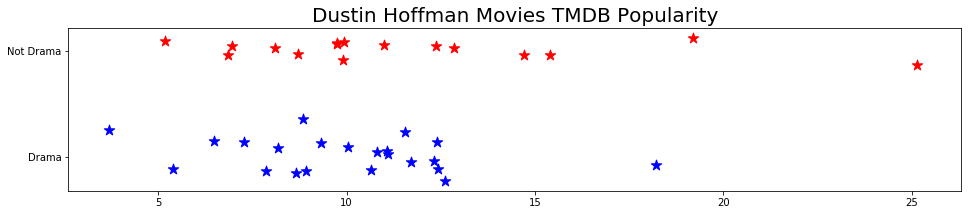

In [108]:
#Plot the distribution for popularity

fig, ax = plt.subplots(1, figsize=(16, 3))
ax.scatter(tested_for_genre_df['popularity'], np.repeat(0, len(tested_for_genre_df['popularity'])) + np.random.normal(0, 0.1, len(tested_for_genre_df['popularity'])), marker="*", c='blue', s=120)
ax.scatter(not_tested_for_genre_df['popularity'], np.repeat(1, len(not_tested_for_genre_df['popularity'])) + np.random.normal(0, 0.1, len(not_tested_for_genre_df['popularity'])),marker="*", c='red', s=120)
plt.title(actor + ' Movies TMDB Popularity', size = 20)
ax.set_yticks([0, 1])

ax.set_yticklabels([test_for_genre, "Not " + test_for_genre])  #generalize the label for and genre
#plt.tight_layout()

Null Hypothesis: H0 - There is no difference in the popularity of Hoffman's movies in drama vs. non-dramatic categories.
This hypothesis will be tested with the Rank Sum Statistic aka the U-Test

In [109]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

not_genre_wins = count_winning_pairs(not_tested_for_genre_df['popularity'], tested_for_genre_df['popularity'])
genre_wins = count_winning_pairs(tested_for_genre_df['popularity'], not_tested_for_genre_df['popularity'])
print("Total Number of Comparisons: {}\n".format(len(not_tested_for_genre_df['profit'])*len(tested_for_genre_df['profit'])))
print("Number of 'Not-in-Genre' Movie Wins: {}\n".format(not_genre_wins))
print("Number of In Genre: " + test_for_genre + " Movie Wins: {}".format(genre_wins))

Total Number of Comparisons: 352

Number of 'Not-in-Genre' Movie Wins: 197.0

Number of In Genre: Drama Movie Wins: 155.0


The total number of wins is the total number of comparisons between a popularity of an "in genre" movie and the popularity of a not-in-genre movie.

In [110]:
# Now, using the U-Test (aka the Mann-Whitney U Statistic) calculate 
#    the Rank Sum Statistic
res = stats.mannwhitneyu(not_tested_for_genre_df['popularity'], tested_for_genre_df['popularity'], alternative="greater")
print("p-value for 'Not-in-Genre' Movie Popularity > " + test_for_genre + " Movie Popularity: {:2.3f}".format(res.pvalue))

p-value for 'Not-in-Genre' Movie Popularity > Drama Movie Popularity: 0.272


*********************************

Clearly, Non Dramatic Hoffman movies are more popular than his Dramatic movies, 
at least in the measure of popularity in the TMDB.

*****Note that this conclusion will change for each actor and each genre tested!!!!

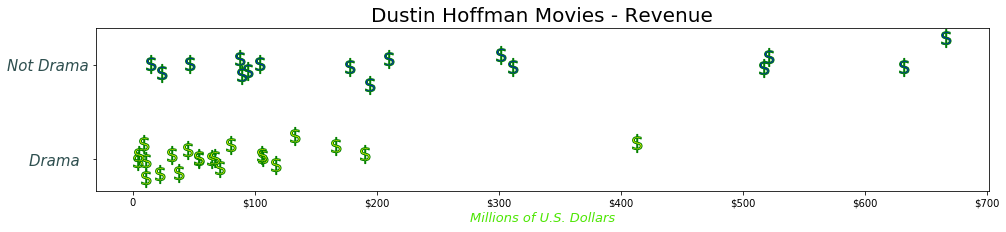

In [114]:
#Plot the distribution for profit
fig, ax = plt.subplots(1, figsize=(16, 3))
ax.scatter(tested_for_genre_df['revenue'], np.repeat(0, len(tested_for_genre_df['revenue'])) + np.random.normal(0, 0.1, len(tested_for_genre_df['revenue'])), marker='$''\$''$', c='yellow', edgecolors='green', s=330)
ax.scatter(not_tested_for_genre_df['revenue'], np.repeat(1, len(not_tested_for_genre_df['revenue'])) + np.random.normal(0, 0.1, len(not_tested_for_genre_df['revenue'])),marker='$''\$''$',c='blue', edgecolors='green', s=330)
plt.title(actor + ' Movies - Revenue', size=20)


def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(value / 1000000))
    if N == 0:
        return "0"
    elif N == 100:
        return ("$100")
    elif N == 200:
        return ("$200")
    elif N == 300:
        return ("$300")
    elif N == 400:
        return ("$400")
    elif N == 500:
        return ("$500")
    elif N == 600:
        return ("$600")
    elif N == 700:
        return ("$700")
    else:
        return ("$800")

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.set_xlabel('Millions of U.S. Dollars', backgroundcolor='white', color=(.3, .9, .01), animated=True, fontstyle='italic', size=13)
ax.set_yticks([0, 1])
_nothing = ax.set_yticklabels([test_for_genre + "  ", "Not " + test_for_genre], fontstyle='oblique', color=(.18, .31, .31), size='15')
#plt.tight_layout()

******
Null Hypothesis: H0 - There is no difference in the revenue of Hoffman's movies in drama vs. non-dramatic categories.
This hypothesis will be tested with the Rank Sum Statistic aka the U-Test
*******Note that this will change for each actor and genre tested.

In [117]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

not_genre_wins = count_winning_pairs(not_tested_for_genre_df['revenue'], tested_for_genre_df['revenue'])
genre_wins = count_winning_pairs(tested_for_genre_df['revenue'], not_tested_for_genre_df['revenue'])
print("Total Number of Comparisons: {}\n".format(len(not_tested_for_genre_df['revenue'])*len(tested_for_genre_df['revenue'])))
print("Number of 'Not-in-Genre' Movie Wins: {}\n".format(not_genre_wins))
print("Number of In Genre: " + test_for_genre + " Movie Wins: {}".format(genre_wins))

Total Number of Comparisons: 352

Number of 'Not-in-Genre' Movie Wins: 272.0

Number of In Genre: Drama Movie Wins: 80.0


Remember, the total number of "wins" is the total number of comparisons between the revenue of a in-genre movie and the revenue of a not-in-genre movie.

In [118]:
# Now, using the U-Test (aka the Mann-Whitney U Statistic) calculate 
#    the Rank Sum Statistic
res = stats.mannwhitneyu(not_tested_for_genre_df['revenue'], tested_for_genre_df['revenue'], alternative="greater")

print("p-value for 'Not-in-Genre' Movie Popularity > " + test_for_genre + " Movie Popularity: {:2.3f}".format(res.pvalue))

p-value for 'Not-in-Genre' Movie Popularity > Drama Movie Popularity: 0.002


******
Clearly, Non Dramatic Hoffman movies are make more money than his Dramatic movies.
*****Note that this conclusion willchange for each actor & genre tested.